In [101]:
import pandas as pd, os, numpy as np, matplotlib.pyplot as plt
os.chdir(r"C:\Users\Melanie\OneDrive - Rensselaer Polytechnic Institute\Desktop\School\24_Spring\Data Analytics\DA_Project\New Datasets")
main = pd.read_csv("main.csv")

In [102]:
df = main[main["Year"].between(2011,2021)]
np.shape(df)
11*72

792

In [103]:
df.head()

,Country,Year,Biogas CHP,Coal and peat CHP,Fossil fuels n.e.s. CHP,Geothermal energy CHP,Liquid biofuels CHP,Natural gas CHP,Nuclear CHP,Oil CHP,...,Off-grid Solar photovoltaic Inv,Offshore wind energy Inv,Oil Inv,On-grid Solar photovoltaic Inv,Onshore wind energy Inv,Other primary solid biofuels n.e.s. Inv,Pumped storage Inv,Renewable hydropower Inv,Renewable municipal waste Inv,Solar thermal energy Inv
11,Austria,2011,220.897,3199.89,0.0,0.0,23.295,21942.3,0.0,3871.15,...,0.0,0.0,0.0,0.0,344.24,0.0,0.00,105.70,0.00,0.0
12,Austria,2012,217.165,3110.26,0.0,0.0,0.000,22829.3,0.0,3704.43,...,0.0,0.0,0.0,0.0,88.13,0.0,187.78,0.00,0.00,0.0
13,Austria,2013,186.185,3285.50,0.0,0.0,0.000,21786.3,0.0,3243.06,...,0.0,0.0,0.0,0.0,204.76,0.0,0.00,0.00,89.94,0.0
14,Austria,2014,123.939,3367.82,0.0,0.0,0.000,18439.0,0.0,2309.33,...,0.0,0.0,0.0,0.0,73.45,0.0,0.00,346.64,0.00,0.0
15,Austria,2015,77.056,3910.95,0.0,0.0,0.000,19028.6,0.0,3878.80,...,0.0,0.0,0.0,0.0,92.22,0.0,0.00,182.96,0.00,0.0


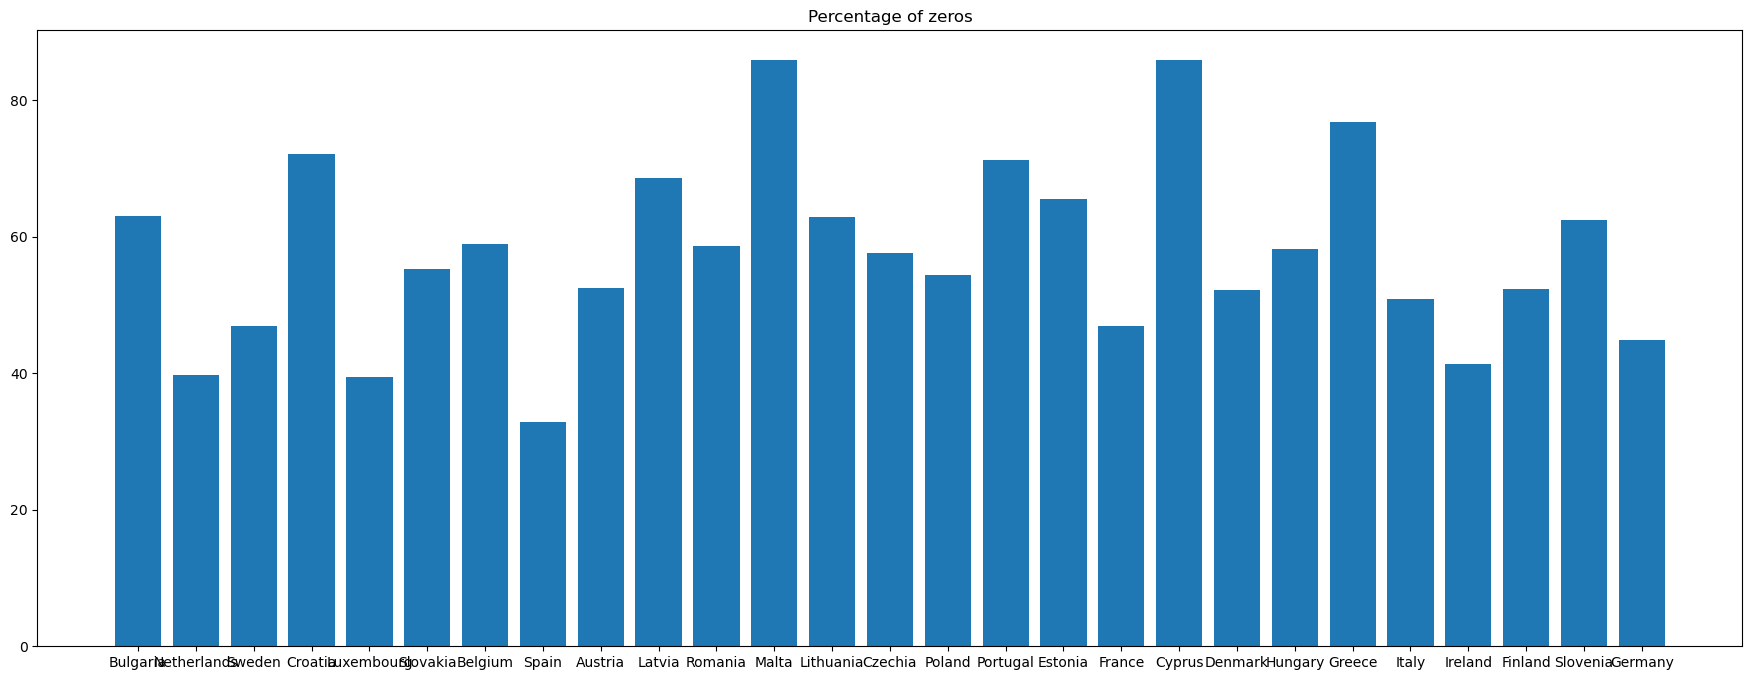

In [104]:
countries = list(set(main["Country"]))
zero_percent = []
for c in countries:
    country_data = df[df["Country"] == c].iloc[:,2:]
    zero_percent.append((792 - np.count_nonzero(country_data))/792*100)
plt.figure(figsize=(22,8))
plt.bar(countries, zero_percent)
plt.title("Percentage of zeros")
plt.show()

In [105]:
df = df[~df["Country"].isin(["Croatia","Malta"])]

In [110]:
all_columns = df.columns
def add_column(new_name, to_sum):
    ts = to_sum[0]
    print([c for c in all_columns if ts in c])

In [107]:
add_column("Nonrenewable",["Coal and peat","Fossil fuels n.e.s.","Natural gas","Oil"])
add_column("Wind Energy",["Offshore wind energy","Onshore wind energy"])
add_column("Solar Energy",["Concentrated solar power","Off-grid Solar photovoltaic","On-grid Solar photovoltaic","Solar thermal energy"])
add_column("Hydro Energy",["Marine energy","Pumped storage","Renewable hydropower"])
add_column("Biofuels",["Biogas","Liquid biofuels",'Other primary solid biofuels n.e.s.'])
add_column("Geothermal Energy",["Geothermal energy"])
add_column("Trash Energy",['Non-renewable municipal waste','Renewable municipal waste'])
add_column("Nuclear Energy",["Nuclear"])
add_column("Misc Energy",["Multiple renewables*"])

In [108]:
df.columns

Index(['Country', 'Year', 'Biogas CHP', 'Coal and peat CHP',
       'Fossil fuels n.e.s. CHP', 'Geothermal energy CHP',
       'Liquid biofuels CHP', 'Natural gas CHP', 'Nuclear CHP', 'Oil CHP',
       'Other non-renewable energy CHP', 'Other renewable energy CHP',
       'Renewable municipal waste CHP', 'Solar thermal energy CHP',
       'Solid biofuels CHP', 'Biogas comm', 'Coal and peat comm',
       'Fossil fuels n.e.s. comm', 'Geothermal energy comm',
       'Liquid biofuels comm', 'Natural gas comm', 'Nuclear comm', 'Oil comm',
       'Other non-renewable energy comm', 'Other renewable energy comm',
       'Renewable municipal waste comm', 'Solar thermal energy comm',
       'Solid biofuels comm', 'Solid Fossil Fuels Dependency',
       'Oil and Petroleum (no boifuel) Dependency', 'Natural Gas Dependency',
       'Biogas Cap', 'Coal and peat Cap', 'Fossil fuels n.e.s. Cap',
       'Geothermal energy Cap', 'Liquid biofuels Cap', 'Marine energy Cap',
       'Mixed Hydro Plants Cap'

In [94]:
ag = (df == 0).astype(int).sum(axis=0)/297
remove_columns = ag[ag > 0.8].index
df = df.drop(columns = remove_columns)

In [99]:
ag2 = (df == 0).astype(int).sum(axis=0)/297
ag2[ag2 > 0.75]

Other renewable energy CHP    0.767677
Solar thermal energy Cap      0.791246
dtype: float64

In [ ]:
countries = list(set(main["Country"]))
zero_percent = []
for c in countries:
    country_data = df[df["Country"] == c].iloc[:,2:]
    zero_percent.append((792 - np.count_nonzero(country_data))/792*100)
plt.figure(figsize=(22,8))
plt.bar(countries, zero_percent)
plt.title("Percentage of zeros")
plt.show()

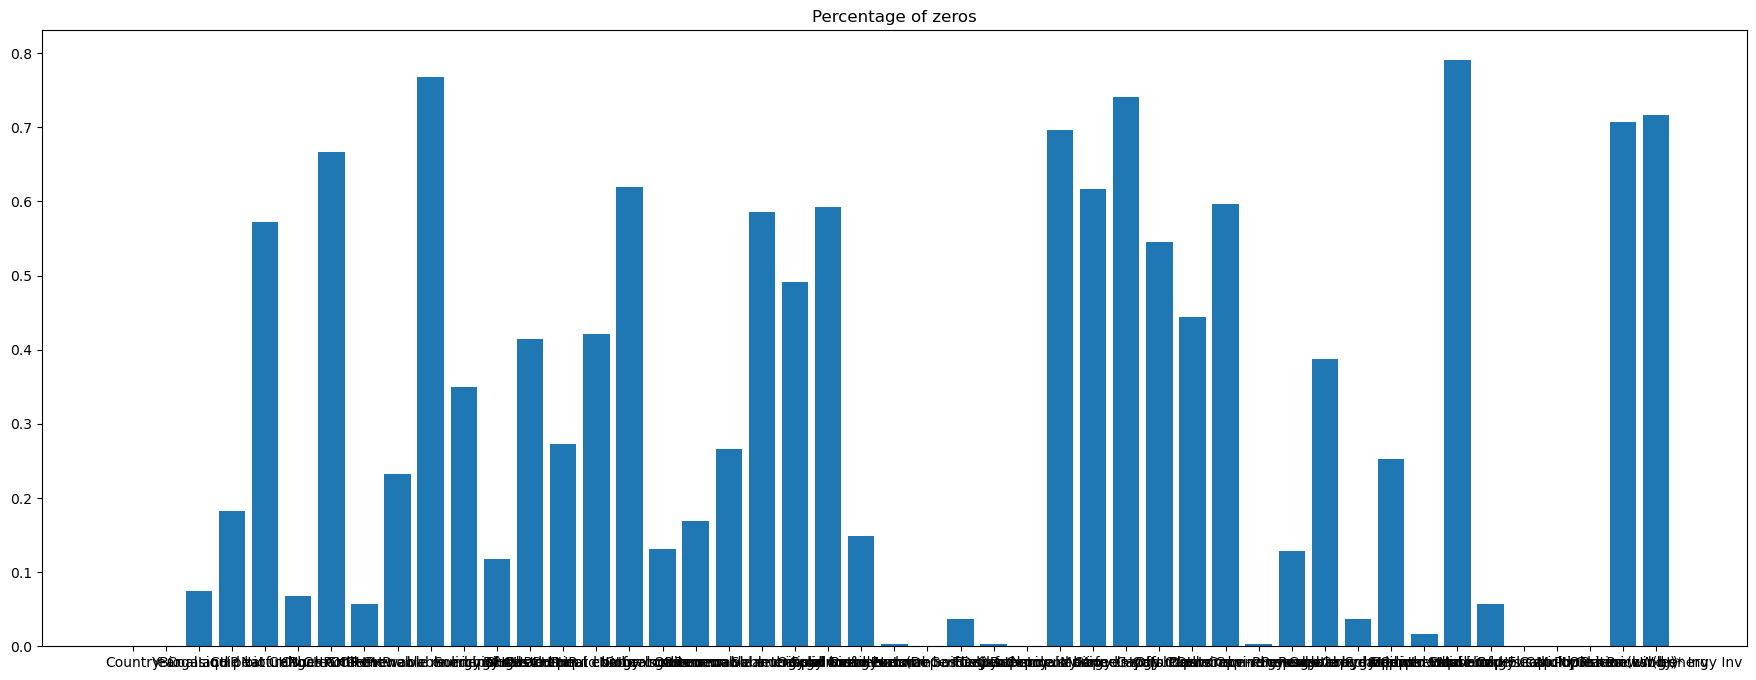

In [95]:
plt.figure(figsize=(22,8))
plt.bar(df.columns, (df == 0).astype(int).sum(axis=0)/297)
plt.title("Percentage of zeros")
plt.show()